# Brief 11 - KNN  
  
### Jeux de données:
- Breast_Cancer.csv  
  
### Contenu du git:
- Ce fichier: brief11-KNN-rendu.ipynb
- Le sujet: Classification de patients souffrant d’un cancer.pdf  
  
### Sujet:
1. Réaliser l'analyse exploratoire des données
2. Visualiser les données
3. Déclarer le vecteur de caractéristiques et la variable cible
4. Divisez les données en un ensemble d'entraînement et de test séparé
5. Feature engineering (Ingénierie des fonctionnalités) : processus de
transformation des données brutes en fonctionnalités utiles qui nous aident à mieux
comprendre notre modèle et à augmenter sa puissance prédictive : tips : utiliser
.isnull().sum()
Nous supposons que des données sont manquantes aléatoirement. Deux méthodes
peuvent être utilisées pour imputer les valeurs manquantes. L'une est l'imputation
moyenne ou médiane et l'autre est l'imputation par échantillon aléatoire. Lorsqu'il y a
des valeurs aberrantes dans l'ensemble de données, nous devrions utiliser
l'imputation médiane. Vous pouvez donc utiliser des mécanismes d'imputation
médiane parce que l'imputation médiane est robuste aux valeurs
aberrantes.L'imputation doit être effectuée sur l'ensemble d'apprentissage, puis
propagée vers l'ensemble de test. Cela signifie que les mesures statistiques à utiliserpour remplir les valeurs manquantes à la fois dans le train et dans l'ensemble d'essai
doivent être extraites de l'ensemble de train uniquement. Ceci pour éviter le
surajustement.
6. Feature scaling
7. Ajuster le classificateur à l'ensemble d'entraînement
8. Prédire les résultats du test​ (predict() et predict_proba())
9. Vérifiez le score de précision : Comparez la précision du modèle avec une
précision nulle. La précision du modèle sur ce jeu de données devrait être très
élevée. Mais, nous ne pouvons pas dire que notre modèle est très bon basé
seulement sur cette prédiction. Nous devons le comparer avec la précision nulle. La
précision nulle est la précision qui pourrait être obtenue en prédisant toujours la
classe la plus fréquente. Vous devez donc vérifier la distribution des classes dans
l'ensemble de test.
10. Reconstruire le modèle de classification kNN en utilisant différentes valeurs de
k (vous pouvez par exemple augmenter la valeur de k et voir son effet sur la
précision)
11. Matrice de confusion. La matrice de confusion vous donnera une image claire de la
performance du modèle de classification et des types d'erreurs produites par le
modèle. Elle affiche un résumé des prévisions correctes et incorrectes ventilées par
catégorie.
12. Métriques de classification. rapport de classification : affiche les scores de
précision, de rappel, de f1 et de support du modèle
Nous pouvons classer les observations par probabilité de cancer bénin ou malin.
Prédisez les probabilités. Pour cela, choisissez la classe avec la probabilité la plus
élevée
Niveau de seuil de classification : Il existe un seuil de classification de 0,5.
Classe 4 - la probabilité de cancer malin est prédite si la probabilité est> 0,5.
Classe 2 - la probabilité de cancer bénin est prévue si la probabilité <0,5.
13. ROC - AUC. ROC Curve est un autre outil permettant de mesurer visuellement les
performances du modèle de classification. ROC Curve est l'acronyme de Receiver
Operating Characteristic Curve. Une courbe ROC est un graphique qui montre les
performances d'un modèle de classification à différents niveaux de seuil de
classification.La courbe ROC trace le taux de vrais positifs (TPR) par rapport au taux
de faux positifs (FPR) à différents niveaux de seuil. Le taux vrai positif (TPR) est
également appelé rappel. Il est défini comme le rapport de TP à (TP + FN). Le taux
de faux positifs (FPR) est défini comme le rapport entre FP et (FP + TN).
ROC AUC signifie Receiver Operating Characteristic - Area Under Curve. C'est une
technique pour comparer les performances du classificateur. Dans cette technique,
nous mesurons l'aire sous la courbe (AUC). Un classificateur parfait aura une AUC
ROC égale à 1, tandis qu'un classificateur purement aléatoire aura une AUC ROC
égale à 0,5.
Ainsi, ROC AUC est le pourcentage du tracé ROC qui se trouve sous la courbe.
14. Utiliser la validation croisée K-Fold : Il s’agit d’une technique de validation croisée
pour améliorer les performances du modèle. La validation croisée est une méthode
statistique d'évaluation des performances de généralisation. Elle est plus stable et
plus approfondie que l'utilisation d'un fractionnement train-test pour évaluer les
performances du modèle.
15. Résultats et conclusion
16. Bonus : Implémenter votre propre algorithme KNN​ . Vous pouvez vous appuyer
sur cet algorithme :
L’algorithme kNN
1. Charger les données
2. Initialiser k au nombre de plus proches voisins choisi
3. 3. Pour chaque exemple dans les données:
3.1 Calculer la distance entre notre requête et l’observation itérative actuelle
de la boucle depuis les données.
3.2 Ajouter la distance et l’indice de l’observation concernée à une collection
ordonnée de données
4. Trier cette collection ordonnée contenant distances et indices de la plus petite
distance à la plus grande (dans ordre croissant).
5. Sélectionner les k premières entrées de la collection de données triées
(équivalent aux k plus proches voisins
6. Obtenir les étiquettes des k entrées sélectionnées
7. Si régression, retourner la moyenne des k étiquettes
Si classification, retourner le mode (valeur la plus fréquente/commune) des k
étiquettes
17. Bonus 2 : Comparer les résultats avec un autre algorithme de classification


## Points 1 à 3:  
1. Réaliser l'analyse exploratoire des données
2. Visualiser les données
3. Déclarer le vecteur de caractéristiques et la variable cible

In [120]:
#
#-------------------------------------- Importation bibliothèque ------------------------------------------------------
#

import pandas as pds
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, validation_curve, GridSearchCV, learning_curve
from sklearn.metrics import accuracy_score, classification_report, roc_curve, confusion_matrix, roc_auc_score

#
#-------------------------------------- Classes pour le bief ------------------------------------------------------
#

class B11:

    def normal(xtrain, xtest, algo_normalisation= StandardScaler): #, algo_normalisation= StandardScaler
        norm= algo_normalisation()
        xtrainnorm= norm.fit_transform(xtrain)
        xtestnorm= norm.fit_transform(xtest)
        return xtrainnorm, xtestnorm

    def OptimisationParametreNVoisin(x_train, x_test, y_train, y_test, plage= range(1,15)):
        res= []

        for k in plage:
            classifier_KNN = KNeighborsClassifier(n_neighbors= k)
            classifier_KNN.fit(x_train, y_train)
            res.append([classifier_KNN.score(x_test, y_test),k])

        res= np.array(res).T
        return res

    def EncodeLabel(y):
        le = LabelEncoder()
        yenc= le.fit_transform(y)
        return yenc

    def ch_tri_inv(tab):
        ind= np.argsort(tab[0])
        ind= ind[::-1]
        #print(ind)
        ch1= 'Précision: Nb voisin:\n'
        tri= [ [tab[0][i], int(tab[1][i])] for i in ind]
        for i in range(0, len(tri)):
            ch1 = ch1 + f"{100 * tri[i][0]:.2f} %" + ' : ' + f"{tri[i][1]:02d}" + '\t'
        #print(ch)
        return ch1


    def ma_confuse(p, mc, n, std):
        print(f"Pour un KNN de {n} voisins dont les données ont été normalisées par {std} les résultats sont:")
        print(f"La précision du modèle est de {100 * p:.2f} %.")
        print(f"La matrice de confusion donne:\n{mc[0][0]} de vrai positif pour {mc[0][1]} de faux positif soit une précision de \
{100 * mc[0][0]/(mc[0][0]+mc[0][1]):.2f} %.\n{mc[1][1]} de vrai négatif pour {mc[1][0]} de faux négatif soit une précision de \
{100 * mc[1][1]/(mc[1][0]+mc[1][1]):.2f} %.")


    def stats_cross_val(norm, x, y, cv, voisin):
        #classifier_KNN= KNeighborsClassifier(n_neighbors= voisin)
        #classifier_KNN.fit(x, y)

        score= cross_val_score(KNeighborsClassifier(voisin), x, y, cv= cv, scoring= "accuracy")
        ch= ''
        for i in range(0,cv):
            #print(score[i])
            ch= ch + f"{100 * score[i]:.2f} %" + ", "
        ch= ch[:len(ch)-2]
        
        print(f"\nCross Validation. Les données ont été standardisé par la méthode {norm}. Le nombre de voisins est {voisin}.")
        print(f"La précision obtenu sur les {cv} échantillons est de {ch}. La moyenne des scores est: {100*score.mean():.2f} % et \
l'écart type de {100*score.std():.2f} %.")


In [98]:
# Importer les données
crabe= pds.read_csv("Breast_Cancer.csv")
print(f"Taille du jeux de donnée: {crabe.shape[0]} lignes x {crabe.shape[1]} colonnes.")
#print(crabe.info())


Taille du jeux de donnée: 569 lignes x 33 colonnes.


On remarque la présence d'une **33 ème colonnes** "Unnamed: 32" (pour peut qu'on prenne le soin de décommenter le print info!). Cette colonne ne contient aucunes données et est généré à cause d'une virgule dans le fichier csv située à la fin de la première ligne.  
D'autre part, la **colonne "id"** ne contient aucune donnée qui nous intéresse pour l'étude du data set.
- **On supprimera ces colonnes**
  
La colonne **"diagnosis"** sera extraite et sera la **variable cible**. Les **autres données** composeront **le vecteur de caractéristiques**.

In [99]:
crabe.drop("Unnamed: 32", axis= 1, inplace= True)
crabe.drop("id", axis= 1, inplace= True)
diagnostic= crabe.diagnosis
crabe.drop("diagnosis", axis= 1, inplace= True)

Dans ce jeux de données, 212 sont atteintes d'une tumeur cancéreuse et 357 ont une tumeur bénigne.

Le jeux de donnée est donc relativement équilibré avec 37.26% de tumeur cancéreuse et 62.74% de tumeur bénigne.


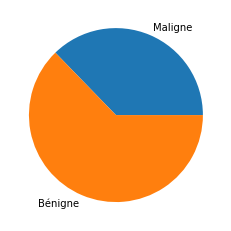

In [100]:
# A DECOMMENTER POUR AFFICHAGE DES STATS

#print(crabe.info())
#pds.set_option('display.max_columns', None)
#print(crabe.describe())
#print(diagnostic.unique()) # Vérifie que l'on à que 2 possible pour cette variable: M= Maligne ou B= Bénin
m= diagnostic[diagnostic== 'M'].size
b= diagnostic[diagnostic== 'B'].size
    
print(f"Dans ce jeux de données, {m} sont atteintes d'une tumeur cancéreuse et {b} ont une tumeur bénigne.")

print(f"\nLe jeux de donnée est donc relativement équilibré avec {100*m/(m+b):.2f}% de tumeur cancéreuse et {100*b/(m+b):.2f}% de tumeur bénigne.")
_= plt.pie([m, b], labels= ["Maligne","Bénigne"])
#plt.plot()

Les données sont maintenant réparties dans 2 tableaux:
- L'un contenant les variables d'entrées
- L'autre contient les labels.
  
Les noms de colonnes sont les suivants:  
<p style="text-align: center;"><b>Liste des colonnes du jeux de données originel:</b></p>

| | | | | | | |
|---|-----------|---------------|---------------|---------------|-----------|-------------------|
|id	|diagnosis	|radius_mean	|texture_mean	|perimeter_mean	|area_mean	|smoothness_mean	|
| | | | | | | |
|compactness_mean	|concavity_mean	|concave points_mean	|symmetry_mean	|fractal_dimension_mean	|radius_se	|texture_se	|perimeter_se	|
| | | | | | | |
area_se	|smoothness_se	|compactness_se	|concavity_se	|concave points_se	|symmetry_se	|fractal_dimension_se	|
| | | | | | | |
radius_worst	|texture_worst	|perimeter_worst	|area_worst	|smoothness_worst	|compactness_worst	|concavity_worst	|
| | | | | | | |
concave points_worst	|symmetry_worst	|fractal_dimension_worst| | | | |



## Point 4, 5 et 6:  
4. Divisez les données en un ensemble d'entraînement et de test séparé  
Le découpage sera fait après la mise à l'échelle.  
5. Feature engineering  
Il n'y a pas de problème de valeurs de type Nan ou None. Nous pouvons passer au point suivant.  
6. Feature scaling

In [101]:
# Découpe du jeux de donnée en jeux d'entrainement et de test
x_entrainement, x_test, y_entrainement, y_test = train_test_split(crabe, diagnostic, test_size=0.2, shuffle= False)

# Normalisation avec LabelEncoder
y_entrainement= B11.EncodeLabel(y_entrainement)
y_test= B11.EncodeLabel(y_test)

# Normalisation des données d'entrainement et de test
x_entrainement_std, x_test_std= B11.normal(x_entrainement, x_test, algo_normalisation= StandardScaler)
x_entrainement_minmax, x_test_minmax= B11.normal(x_entrainement, x_test, algo_normalisation= MinMaxScaler)
x_entrainement_robuste, x_test_robuste= B11.normal(x_entrainement, x_test, algo_normalisation= RobustScaler)


In [107]:
print("Vérifions que les données mise à l'échelles donnent des courbes identiques aux données brutes.")

#_= pds.DataFrame(x_entrainement_std).hist(figsize=(17, 17), rwidth = 0.8, bins= 20)

# DECOMMENTER LA LIGNE CI DESSUS POUR AFFICHAGE DES COURBES 

Vérifions que les données mise à l'échelles donnent des courbes identiques aux données brutes.


In [108]:
#_= crabe.hist(figsize=(17, 17), rwidth = 0.8, bins= 20)

# DECOMMENTER LA LIGNE CI DESSUS POUR AFFICHAGE DES COURBES 

## Point 7 et 10 :  
7. Ajuster le classificateur à l'ensemble d'entraînement
10. Reconstruire le modèle de classification kNN en utilisant différentes valeurs de k  
  
On recherchera la valeur de l'hyperparamètre n_neighbors pour laquelle la précision est la meilleure. On réalisera le test avec toutes les méthodes utilisées pour réaliser les mises à l'échelle ainsi qu'un test sans que les données soient mises à l'échelle.  
Problème: Comment éviter l'overfitting.... ?

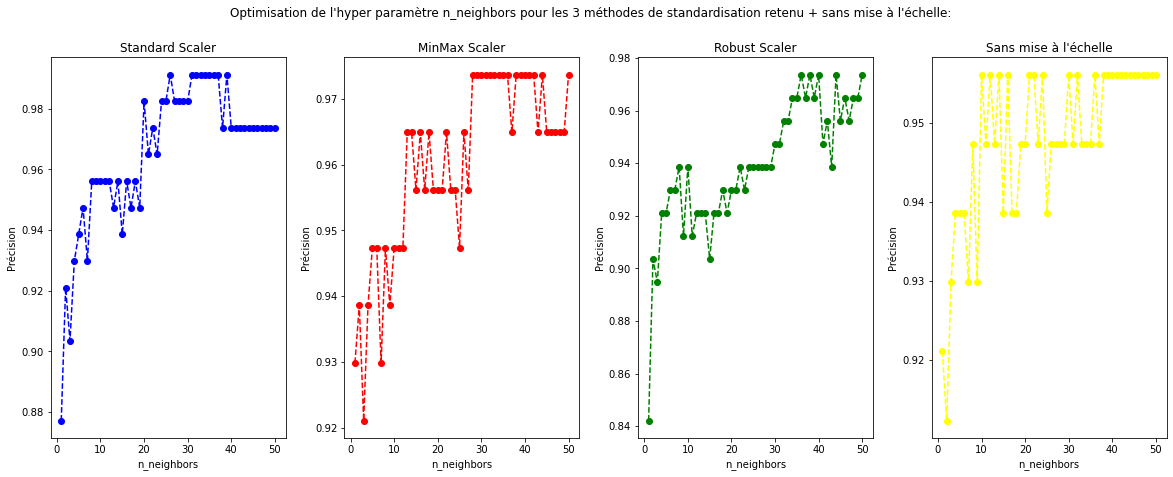

In [109]:
plage= range(1,51)
resstd= B11.OptimisationParametreNVoisin(x_entrainement_std, x_test_std, y_entrainement, y_test, plage= plage)

resminmax= B11.OptimisationParametreNVoisin(x_entrainement_minmax, x_test_minmax, y_entrainement, y_test, plage= plage)

resrobust= B11.OptimisationParametreNVoisin(x_entrainement_robuste, x_test_robuste, y_entrainement, y_test, plage= plage)

res= B11.OptimisationParametreNVoisin(x_entrainement, x_test, y_entrainement, y_test, plage= plage)

fig, axs = plt.subplots(1, 4, figsize=(20, 7))
plt.gcf().subplots_adjust(wspace = 0.25)

axs[0].plot(resstd[1], resstd[0],linestyle='dashed', marker='o', color= "blue")
axs[0].set_xlabel('n_neighbors')
axs[0].set_ylabel('Précision')
axs[0].set_title('Standard Scaler')

axs[1].plot(resminmax[1], resminmax[0],linestyle='dashed', marker='o', color= "red")
axs[1].set_xlabel('n_neighbors')
axs[1].set_ylabel('Précision')
axs[1].set_title('MinMax Scaler')

axs[2].plot(resrobust[1], resrobust[0],linestyle='dashed', marker='o', color= "green")
axs[2].set_xlabel('n_neighbors')
axs[2].set_ylabel('Précision')
axs[2].set_title('Robust Scaler')

axs[3].plot(res[1], res[0],linestyle='dashed', marker='o', color= "yellow")
axs[3].set_xlabel('n_neighbors')
axs[3].set_ylabel('Précision')
axs[3].set_title("Sans mise à l'échelle")

_= fig.suptitle("Optimisation de l'hyper paramètre n_neighbors pour les 3 méthodes de standardisation retenu + sans mise à l'échelle:")


In [110]:
print("Affichage sous forme de tableau:\n")
print(f"Standardisation StandardScaler, tableau trié:\n{B11.ch_tri_inv(resstd)}")
print(f"\nStandardisation MinmaxScaler, tableau trié:\n{B11.ch_tri_inv(resminmax)}")
print(f"\nStandardisation RobustScaler, tableau trié:\n{B11.ch_tri_inv(resrobust)}")
print(f"\nSans standardisation, tableau trié:\n{B11.ch_tri_inv(res)}")


Affichage sous forme de tableau:

Standardisation StandardScaler, tableau trié:
Précision: Nb voisin:
99.12 % : 33	99.12 % : 34	99.12 % : 35	99.12 % : 36	99.12 % : 37	99.12 % : 26	99.12 % : 31	99.12 % : 39	99.12 % : 32	98.25 % : 30	98.25 % : 25	98.25 % : 28	98.25 % : 27	98.25 % : 24	98.25 % : 20	98.25 % : 29	97.37 % : 49	97.37 % : 22	97.37 % : 50	97.37 % : 38	97.37 % : 48	97.37 % : 41	97.37 % : 42	97.37 % : 43	97.37 % : 44	97.37 % : 45	97.37 % : 46	97.37 % : 40	97.37 % : 47	96.49 % : 23	96.49 % : 21	95.61 % : 08	95.61 % : 09	95.61 % : 10	95.61 % : 12	95.61 % : 11	95.61 % : 16	95.61 % : 14	95.61 % : 18	94.74 % : 13	94.74 % : 17	94.74 % : 19	94.74 % : 06	93.86 % : 15	93.86 % : 05	92.98 % : 07	92.98 % : 04	92.11 % : 02	90.35 % : 03	87.72 % : 01	

Standardisation MinmaxScaler, tableau trié:
Précision: Nb voisin:
97.37 % : 50	97.37 % : 39	97.37 % : 28	97.37 % : 29	97.37 % : 31	97.37 % : 32	97.37 % : 33	97.37 % : 34	97.37 % : 35	97.37 % : 36	97.37 % : 38	97.37 % : 30	97.37 % : 40	97.37 % : 4

Les meilleurs résultats sont obtenus avec la normalisation obtenu grace au **standard scaler** avec un score de 99.12 %.  
Le nombre de voisins correspondant à ce score est de 33, 34, 35, 36, 37, 26, 31, 39 et 32.  
  
Quel paramètrage choisir, celui avec le nombre minimum de voisins, celui avec le maximum de voisin ou une valeur intermédiare entre ces 2 extrêmes?  
La visualisation de la courbe m'incite à ne pas retenir 26 qui semble être au milieu d'une zone ayant un taux de réussite légèrement plus faible. Même remarque pour 39. Je **choisi donc le point médian** de la série 31, 32, 33, **34**, 35, 36 et 37 soit 34. 


## 8. Prédire les résultats du test​ (predict() et predict_proba())

In [111]:
classifier_KNN = KNeighborsClassifier(n_neighbors= 34)
classifier_KNN.fit(x_entrainement_std, y_entrainement)

print("Précision obtenue: ",classifier_KNN.score(x_test_std, y_test))

y_pred = classifier_KNN.predict(x_test_std)

print(classification_report(y_test,y_pred, target_names= ["Bénigne", "Maligne"]))


Précision obtenue:  0.9912280701754386
              precision    recall  f1-score   support

     Bénigne       1.00      0.99      0.99        88
     Maligne       0.96      1.00      0.98        26

    accuracy                           0.99       114
   macro avg       0.98      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



0.6808565531475748 0.31914344685242513


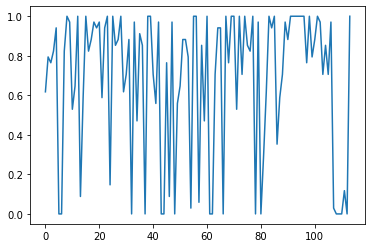

In [114]:
y_pred_prob = classifier_KNN.predict_proba(x_test_std)
print(y_pred_prob[:,0].mean(), y_pred_prob[:,1].mean())
#plt.scatter(y_pred_prob[1],y_pred_prob[0])
_= plt.plot(range(0,len(y_pred)),y_pred_prob[:,0])

## 9. Vérifiez le score de précision :  
Comparez la précision du modèle avec une
précision nulle. La précision du modèle sur ce jeu de données devrait être très
élevée. Mais, nous ne pouvons pas dire que notre modèle est très bon basé
seulement sur cette prédiction. Nous devons le comparer avec la précision nulle. La
précision nulle est la précision qui pourrait être obtenue en prédisant toujours la
classe la plus fréquente. Vous devez donc vérifier la distribution des classes dans
l'ensemble de test.


## 11. Matrice de confusion.  
La matrice de confusion vous donnera une image claire de la
performance du modèle de classification et des types d'erreurs produites par le
modèle. Elle affiche un résumé des prévisions correctes et incorrectes ventilées par
catégorie.


In [115]:
voisin= 34
classifier_KNN = KNeighborsClassifier(n_neighbors= voisin)
classifier_KNN.fit(x_entrainement_std, y_entrainement)

precision= classifier_KNN.score(x_test_std, y_test)

y_pred = classifier_KNN.predict(x_test_std)

matrice_confusion= confusion_matrix(y_test,y_pred)

B11.ma_confuse(precision, matrice_confusion, voisin, "StandardScaler")


Pour un KNN de 34 voisins dont les données ont été normalisées par StandardScaler les résultats sont:
La précision du modèle est de 99.12 %.
La matrice de confusion donne:
87 de vrai positif pour 1 de faux positif soit une précision de 98.86 %.
26 de vrai négatif pour 0 de faux négatif soit une précision de 100.00 %.


## 12. Métriques de classification. rapport de classification :  
affiche les scores de
précision, de rappel, de f1 et de support du modèle
Nous pouvons classer les observations par probabilité de cancer bénin ou malin.
Prédisez les probabilités. Pour cela, choisissez la classe avec la probabilité la plus
élevée
Niveau de seuil de classification : Il existe un seuil de classification de 0,5.
Classe 4 - la probabilité de cancer malin est prédite si la probabilité est> 0,5.
Classe 2 - la probabilité de cancer bénin est prévue si la probabilité <0,5.


## 13. ROC - AUC.  
ROC Curve est un autre outil permettant de mesurer visuellement les
performances du modèle de classification. ROC Curve est l'acronyme de Receiver
Operating Characteristic Curve. Une courbe ROC est un graphique qui montre les
performances d'un modèle de classification à différents niveaux de seuil de
classification.La courbe ROC trace le taux de vrais positifs (TPR) par rapport au taux
de faux positifs (FPR) à différents niveaux de seuil. Le taux vrai positif (TPR) est
également appelé rappel. Il est défini comme le rapport de TP à (TP + FN). Le taux
de faux positifs (FPR) est défini comme le rapport entre FP et (FP + TN).
ROC AUC signifie Receiver Operating Characteristic - Area Under Curve. C'est une
technique pour comparer les performances du classificateur. Dans cette technique,
nous mesurons l'aire sous la courbe (AUC). Un classificateur parfait aura une AUC
ROC égale à 1, tandis qu'un classificateur purement aléatoire aura une AUC ROC
égale à 0,5.
Ainsi, ROC AUC est le pourcentage du tracé ROC qui se trouve sous la courbe.


https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py

## 14. Utiliser la validation croisée K-Fold :  
Il s’agit d’une technique de validation croisée
pour améliorer les performances du modèle. La validation croisée est une méthode
statistique d'évaluation des performances de généralisation. Elle est plus stable et
plus approfondie que l'utilisation d'un fractionnement train-test pour évaluer les
performances du modèle.


In [117]:
voisin= 34
cval= 5


print(f"Score sur le jeux de test: {100*classifier_KNN.score(x_test_std, y_test):.2f} %")

# Le score est meilleur sur les donnée de test!!! Bizarre autant qu'étrange
print(f"Score sur le jeux de d'entrainement: {100*classifier_KNN.score(x_entrainement_std, y_entrainement):.2f} %.") 

B11.stats_cross_val("Standard Scaler", x_entrainement_std, y_entrainement, cval, voisin)


Score sur le jeux de test: 99.12 %
Score sur le jeux de d'entrainement: 95.38 %.

Cross Validation. Les données ont été standardisé par la méthode Standard Scaler. Le nombre de voisins est 34.
La précision obtenu sur les 5 échantillons est de 93.41 %, 91.21 %, 95.60 %, 95.60 %, 97.80 %. La moyenne des scores est: 94.73 % et l'écart type de 2.24 %.


In [118]:
cval= 5
for i in range (1,35):
    B11.stats_cross_val("Standard Scaler", x_entrainement_std, y_entrainement, cval, i)


Cross Validation. Les données ont été standardisé par la méthode Standard Scaler. Le nombre de voisins est 1.
La précision obtenu sur les 5 échantillons est de 96.70 %, 94.51 %, 97.80 %, 96.70 %, 93.41 %. La moyenne des scores est: 95.82 % et l'écart type de 1.62 %.

Cross Validation. Les données ont été standardisé par la méthode Standard Scaler. Le nombre de voisins est 2.
La précision obtenu sur les 5 échantillons est de 96.70 %, 96.70 %, 95.60 %, 95.60 %, 95.60 %. La moyenne des scores est: 96.04 % et l'écart type de 0.54 %.

Cross Validation. Les données ont été standardisé par la méthode Standard Scaler. Le nombre de voisins est 3.
La précision obtenu sur les 5 échantillons est de 95.60 %, 95.60 %, 94.51 %, 96.70 %, 97.80 %. La moyenne des scores est: 96.04 % et l'écart type de 1.12 %.

Cross Validation. Les données ont été standardisé par la méthode Standard Scaler. Le nombre de voisins est 4.
La précision obtenu sur les 5 échantillons est de 96.70 %, 95.60 %, 96.70 %, 96.70 %,

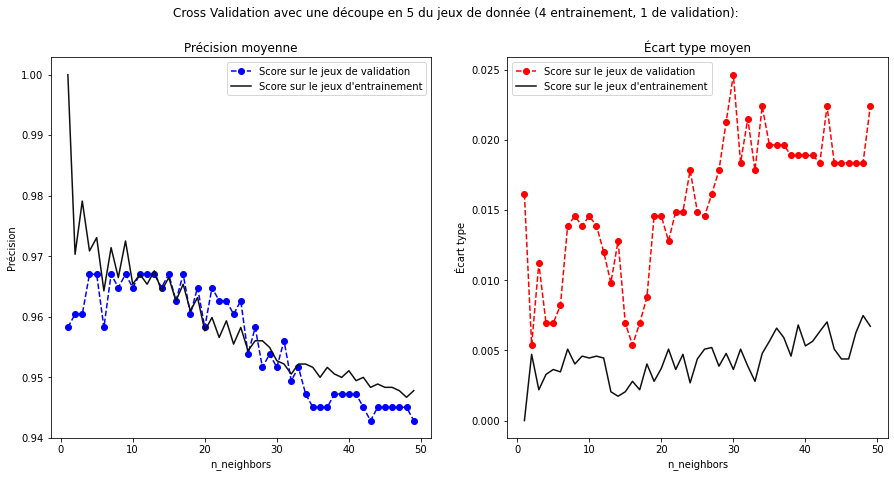

In [119]:
#------------------------------- Courbe de validation pour la validation croisée ------------------------------------------
#
# 9'44'' de la vidéo de machine learnia: https://www.youtube.com/watch?v=w_bLGK4Pteo&t=508s
#

model= KNeighborsClassifier()
k= np.arange(1,50)
cval= 5
score_entrainement, score_validation= validation_curve(model, x_entrainement_std, y_entrainement, param_name= "n_neighbors", param_range= k, cv= cval)

fig, axs = plt.subplots(1, 2, figsize=(15, 7))

axs[0].plot(k,  score_validation.mean(axis= 1),linestyle='dashed', marker='o', color= "blue", label= "Score sur le jeux de validation")
axs[0].plot(k,  score_entrainement.mean(axis= 1),linestyle='solid', color= "#0f0f0f", label= "Score sur le jeux d'entrainement")
axs[0].set_xlabel('n_neighbors')
axs[0].set_ylabel('Précision')
axs[0].set_title('Précision moyenne')
axs[0].legend()

axs[1].plot(k,  score_validation.std(axis= 1),linestyle='dashed', marker='o', color= "red", label= "Score sur le jeux de validation")
axs[1].plot(k,  score_entrainement.std(axis= 1),linestyle='solid', color= "#0f0f0f", label= "Score sur le jeux d'entrainement")
axs[1].set_xlabel('n_neighbors')
axs[1].set_ylabel('Écart type')
axs[1].set_title('Écart type moyen')
axs[1].legend()

_= fig.suptitle(f"Cross Validation avec une découpe en {cval} du jeux de donnée ({cval-1} entrainement, 1 de validation):")


**Les résultats sont assez inantendu.** Le nombre de voisins optimum calculer précédément ne correspond plus à un meilleur score.  
Le scoring sur le jeux d'entrainement est moin bon que sur le jeux de test.  
**Les courbes de validation permettent de repérer des zones d'overfitting**. Quand la précision sur le jeux d'entrainement est trés bonne et que, dans le même temps, les scores sur le jeux de test ou de validation sont moins bon. Ici on peut dire qu'il faudra un nombre de voisin au moins supérieur à 5 voir supérieur ou égal à 10.  
On a aussi une zone avec des score trés ressérer (écart type faible) et une bonne précision autour de 14 à 18. **15 et 16** voisins seraient un bon choix avec cette nouvelle étude qui contraste avec le 34 de la 1ère étude.


In [77]:
#------------------------------- Grid search CV pour optimisation des autres paramètres ------------------------------------------
#
# 12'46'' de la vidéo de machine learnia: https://www.youtube.com/watch?v=w_bLGK4Pteo&t=508s
# ["euclidean", "manhattan", "chebyshev", "minkowski", "wminkowski", "seuclidean", "mahalanobis"]

model= KNeighborsClassifier()
k= np.arange(1,50)
cval= 5

parametres_grid= {"n_neighbors": k, "metric": ["euclidean", "manhattan", "chebyshev", "minkowski"]}
grid= GridSearchCV(model, parametres_grid, cv= cval)

In [78]:
grid.fit(x_entrainement_std, y_entrainement)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan', 'chebyshev',
                                    'minkowski'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [81]:
print(f"Les meilleurs paramètres d'après gridsearchcv serait: {grid.best_params_} pour un score de: {100*grid.best_score_:.2f}.")


Les meilleurs paramètres d'après gridsearchcv serait: {'metric': 'manhattan', 'n_neighbors': 3}
 pour un score de: 97.36.


In [83]:
model= grid.best_estimator_
print(f"Sur notre jeux de test, ce modèle obiendrait un score de {100*model.score(x_test_std, y_test):.2f}")

Sur notre jeux de test, ce modèle obiendrait un score de 93.86


**Ce résultat remet en cause les 2 autres études pour déterminer le meilleur modèle. On pourrait tester le métrique "manhattan" sur KNN.**

In [88]:
model= KNeighborsClassifier()
k= np.arange(12,40)
cval= 5

parametres_grid= {"n_neighbors": k, "metric": ["euclidean", "manhattan", "chebyshev", "minkowski"]}
grid= GridSearchCV(model, parametres_grid, cv= cval)

In [89]:
grid.fit(x_entrainement_std, y_entrainement)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan', 'chebyshev',
                                    'minkowski'],
                         'n_neighbors': array([12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28,
       29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39])})

In [90]:
print(f"Les meilleurs paramètres d'après gridsearchcv serait: {grid.best_params_} pour un score de: {100*grid.best_score_:.2f}.")

Les meilleurs paramètres d'après gridsearchcv serait: {'metric': 'euclidean', 'n_neighbors': 12} pour un score de: 96.70.


In [91]:
model= grid.best_estimator_
print(f"Sur notre jeux de test, ce modèle obiendrait un score de {100*model.score(x_test_std, y_test):.2f}")

Sur notre jeux de test, ce modèle obiendrait un score de 95.61


Avec d'autres paramètres, on améliore la qualité de précision sur le jeux de test, avec une précision moins bonne sur le jeux d'entrainement....  
**Difficile de conclure sur la pertinence de GridSearchCV** 

## Learning Curve (hors brief)  
Une autre optimisation concerne la taille du jeux d'entrainement par rapport au jeux de test. Au dela d'un certain seuil, le modèle ne s'améliore plus et des données d'entrainements supplémentaires ne servent à rien.

In [124]:
voisin= 15
cval= 5
metrique= "euclidean"
modelKNN= KNeighborsClassifier(n_neighbors= voisin, metric= metrique)

taille, train_score, val_score= learning_curve(modelKNN, x_entrainement_std, y_entrainement, train_sizes= np.linspace(0.1, 1, 10),\
                                               cv= cvalLearning curve)


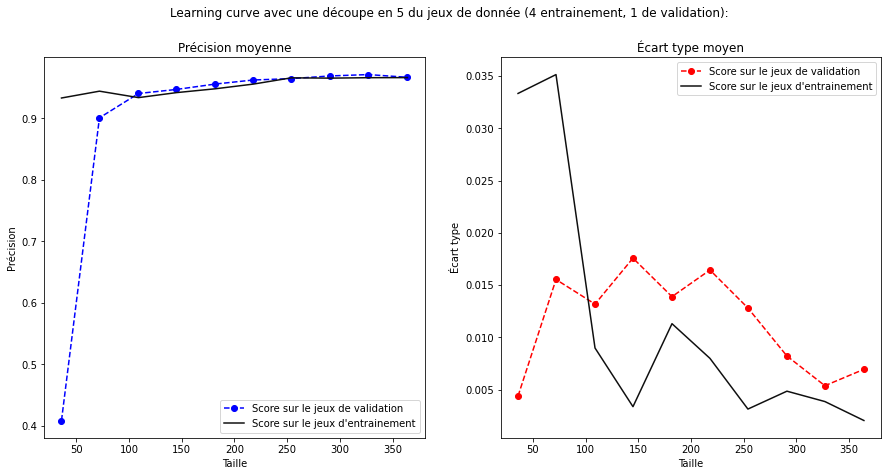

In [126]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))

axs[0].plot(taille, val_score.mean(axis= 1),linestyle='dashed', marker='o', color= "blue", label= "Score sur le jeux de validation")
axs[0].plot(taille, train_score.mean(axis= 1), linestyle='solid', color= "#0f0f0f", label= "Score sur le jeux d'entrainement")
axs[0].set_xlabel('Taille')
axs[0].set_ylabel('Précision')
axs[0].set_title('Précision moyenne')
axs[0].legend()

axs[1].plot(taille, val_score.std(axis= 1),linestyle='dashed', marker='o', color= "red", label= "Score sur le jeux de validation")
axs[1].plot(taille, train_score.std(axis= 1),linestyle='solid', color= "#0f0f0f", label= "Score sur le jeux d'entrainement")
axs[1].set_xlabel('Taille')
axs[1].set_ylabel('Écart type')
axs[1].set_title('Écart type moyen')
axs[1].legend()

_= fig.suptitle(f"Learning curve avec une découpe en {cval} du jeux de donnée ({cval-1} entrainement, 1 de validation):")


Une taille de 30% commence à donner des résultats corrects, au dela de 70% il n'y a plus d'amélioration notable.

## 15. Conclusion

# **Bout de code a supprimer dans le rendu**

In [ ]:
# Le standard scaler n 'est pas compris entre - 2 et 2 !!!!
import numpy as np
import pandas as pds

a= np.random.randint(0,100,100)
b= np.random.randint(400,500, 1000)
c= np.concatenate((a,b),axis= 0)
c= pds.DataFrame(c)
astd=scaler_std.fit_transform(c)
print(astd.min(),astd.max(), astd.min() + astd.max())
